In [1]:
pip install wbdata


In [2]:
import wbdata
import datetime
import pandas as pd

In [3]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [4]:
#wbdata.get_country(300) # to see list of countries
LAMcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
          'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']
NAMcountries=['USA','CAN']
#regions=['LCN','WLD','NAC'] #WORLD = WLD; LAT AM AND CARRIBEAN = LCN; NAC=North America
regions=['NAC','WLD','LCN']
allcountries=LAMcountries+NAMcountries
allregions=allcountries+regions

In [5]:
allregions=country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                    'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR')

In [6]:
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [7]:
wbdata.get_indicator(topic=19)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2     Urban land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.UR.ZS     Urban land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.ZS        Land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)
AG.LND.IRIG.AG.ZS     Agricultural irrigated land (% of total agricultural land)
AG.LND.PRCP.MM        Average precipitation in depth (mm per year)
AG.YLD.CREL.KG      

In [8]:
indicators={"EG.ELC.COAL.ZS":    "Electricity production from coal sources (% of total)",
       "EG.ELC.HYRO.ZS":"Electricity production from hydroelectric sources (% of total)",
            "EG.ELC.NGAS.ZS":"Electricity production from natural gas sources (% of total)",
            "SP.POP.TOTL":"Population, total"
    }

In [9]:
df=wbdata.get_dataframe(indicators,country=allregions)

In [10]:
df2=df.copy() #creates a copy of dataframe; if you instead  do df2=df all changes to df2 will impact df
df2.reset_index(inplace=True)

In [11]:
df2['text']=df2['country']+df2['date'].map(str)

In [12]:
df2.tail

<bound method NDFrame.tail of       country  date  Electricity production from coal sources (% of total)  \
0     Austria  2022                                                NaN       
1     Austria  2021                                                NaN       
2     Austria  2020                                                NaN       
3     Austria  2019                                                NaN       
4     Austria  2018                                                NaN       
...       ...   ...                                                ...       
1759   Sweden  1964                                           0.000000       
1760   Sweden  1963                                           0.108334       
1761   Sweden  1962                                           0.027228       
1762   Sweden  1961                                           0.158561       
1763   Sweden  1960                                           1.076254       

      Electricity production from

In [13]:
df2.info()

<class 'wbdata.api.WBDataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   country                                                         1764 non-null   object 
 1   date                                                            1764 non-null   object 
 2   Electricity production from coal sources (% of total)           1347 non-null   float64
 3   Electricity production from hydroelectric sources (% of total)  1347 non-null   float64
 4   Electricity production from natural gas sources (% of total)    1347 non-null   float64
 5   Population, total                                               1764 non-null   float64
 6   text                                                            1764 non-null   object 
dtypes: float64(4), object(3)
memory usage: 96.6+ KB


In [14]:
dfnas=df2.isnull()
dfnas

,country,date,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
0,False,False,True,True,True,False,False
1,False,False,True,True,True,False,False
2,False,False,True,True,True,False,False
3,False,False,True,True,True,False,False
4,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...
1759,False,False,False,False,False,False,False
1760,False,False,False,False,False,False,False
1761,False,False,False,False,False,False,False
1762,False,False,False,False,False,False,False


In [15]:
df2=df2.dropna()

In [16]:
df2.tail

<bound method NDFrame.tail of       country  date  Electricity production from coal sources (% of total)  \
7     Austria  2015                                           8.226608       
8     Austria  2014                                           7.970332       
9     Austria  2013                                           9.456235       
10    Austria  2012                                           9.087469       
11    Austria  2011                                          11.778970       
...       ...   ...                                                ...       
1759   Sweden  1964                                           0.000000       
1760   Sweden  1963                                           0.108334       
1761   Sweden  1962                                           0.027228       
1762   Sweden  1961                                           0.158561       
1763   Sweden  1960                                           1.076254       

      Electricity production from

In [17]:
df2.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Croatia', 'Hungary', 'Ireland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic',
       'Slovenia', 'Sweden'], dtype=object)

In [18]:
df2.query("country == 'Austria'")
df2.query("country == 'Sweden'")
df2.query("country == 'Belgium'")
df2.query("country == 'Bulgaria'")
df2.query("country == 'Ireland'")
df2.query("country == 'Poland'")

,country,date,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
1393,Poland,2015,80.906165,1.114755,3.886431,37986412.0,Poland2015
1394,Poland,2014,82.993287,1.377218,3.361345,38011735.0,Poland2014
1395,Poland,2013,85.206862,1.486996,3.212984,38040196.0,Poland2013
1396,Poland,2012,84.357898,1.259655,3.871103,38063164.0,Poland2012
1397,Poland,2011,86.790544,1.429027,3.568582,38063255.0,Poland2011
1398,Poland,2010,88.092101,1.858819,3.054320,38042794.0,Poland2010
1399,Poland,2009,89.248351,1.571588,3.167660,38151603.0,Poland2009
1400,Poland,2008,90.887467,1.390990,3.024368,38125759.0,Poland2008
1401,Poland,2007,91.826708,1.481472,2.823741,38120560.0,Poland2007
1402,Poland,2006,92.450424,1.270185,2.848897,38141267.0,Poland2006


In [19]:
df2 = df2.rename(columns={'date': 'Year', 'country': 'Country'})

In [20]:
df2

,Country,Year,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
7,Austria,2015,8.226608,59.997086,12.601396,8642699.0,Austria2015
8,Austria,2014,7.970332,66.557388,8.772072,8546356.0,Austria2014
9,Austria,2013,9.456235,65.132455,10.302091,8479823.0,Austria2013
10,Austria,2012,9.087469,63.753457,14.133314,8429991.0,Austria2012
11,Austria,2011,11.778970,54.989401,19.973664,8391643.0,Austria2011
...,...,...,...,...,...,...,...
1759,Sweden,1964,0.000000,94.942879,0.000000,7661354.0,Sweden1964
1760,Sweden,1963,0.108334,93.236489,0.000000,7604328.0,Sweden1963
1761,Sweden,1962,0.027228,95.975148,0.000000,7561588.0,Sweden1962
1762,Sweden,1961,0.158561,95.048218,0.000000,7519998.0,Sweden1961


In [21]:
# Function to change year type
def change_year_type(df2):

    #print("Changing type of Year for: " + df.loc[0]['Country'])
    # validation to check if year column exists in the dataframe
    if 'Year' in df2.columns:
        # convert year to a string
        df['Year'] = df2.Year.astype(str)

    print("Completed changing type")
    # return the updated df
    return df2

In [22]:
df2['Year'] = df2.Year.astype(str)

In [23]:
df2

,Country,Year,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
7,Austria,2015,8.226608,59.997086,12.601396,8642699.0,Austria2015
8,Austria,2014,7.970332,66.557388,8.772072,8546356.0,Austria2014
9,Austria,2013,9.456235,65.132455,10.302091,8479823.0,Austria2013
10,Austria,2012,9.087469,63.753457,14.133314,8429991.0,Austria2012
11,Austria,2011,11.778970,54.989401,19.973664,8391643.0,Austria2011
...,...,...,...,...,...,...,...
1759,Sweden,1964,0.000000,94.942879,0.000000,7661354.0,Sweden1964
1760,Sweden,1963,0.108334,93.236489,0.000000,7604328.0,Sweden1963
1761,Sweden,1962,0.027228,95.975148,0.000000,7561588.0,Sweden1962
1762,Sweden,1961,0.158561,95.048218,0.000000,7519998.0,Sweden1961


In [24]:
df_copy=df2.drop(['Year', 'Country'], axis='columns')
df_copy.describe()

,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total"
count,1347.000000,1347.000000,1347.000000,1.347000e+03
mean,32.434528,17.820971,12.775226,1.884055e+07
std,27.498896,22.895438,17.677560,2.212318e+07
min,0.000000,0.000000,0.000000,3.019960e+05
25%,8.650601,1.060308,0.260472,4.608997e+06
50%,27.583757,7.513072,4.899351,9.219637e+06
75%,49.759521,25.165542,17.290878,2.318165e+07
max,97.814208,95.975148,93.904625,8.253418e+07


In [25]:
import pandas as pd
import numpy as np
import requests

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-31-255a32036753>:8: FutureWarning: The default value of numeric_only in WBDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', annot=True, center=0,ax=ax)


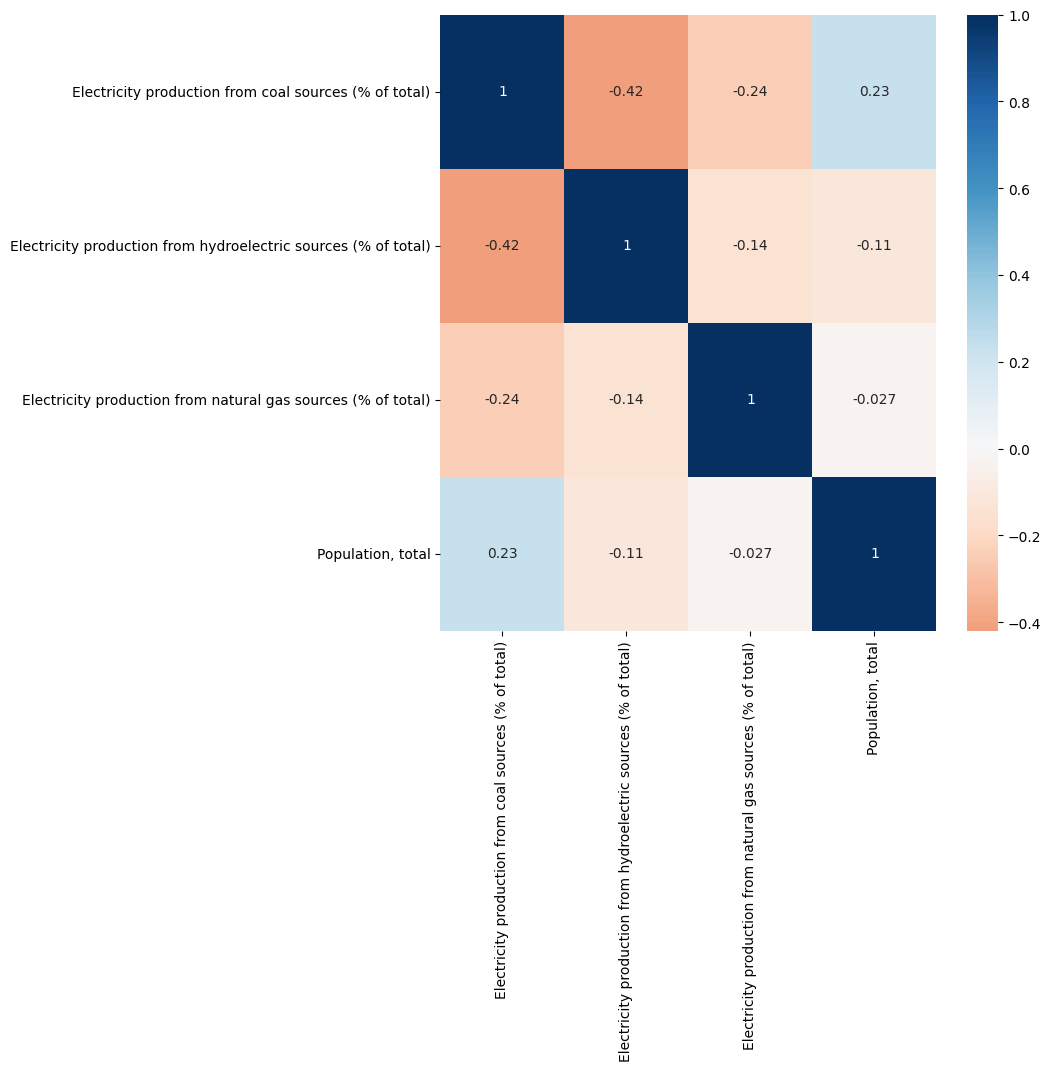

In [31]:
# create a copy
df_cleaned_us_copy=df2.copy()
# Exclude the categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', annot=True, center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

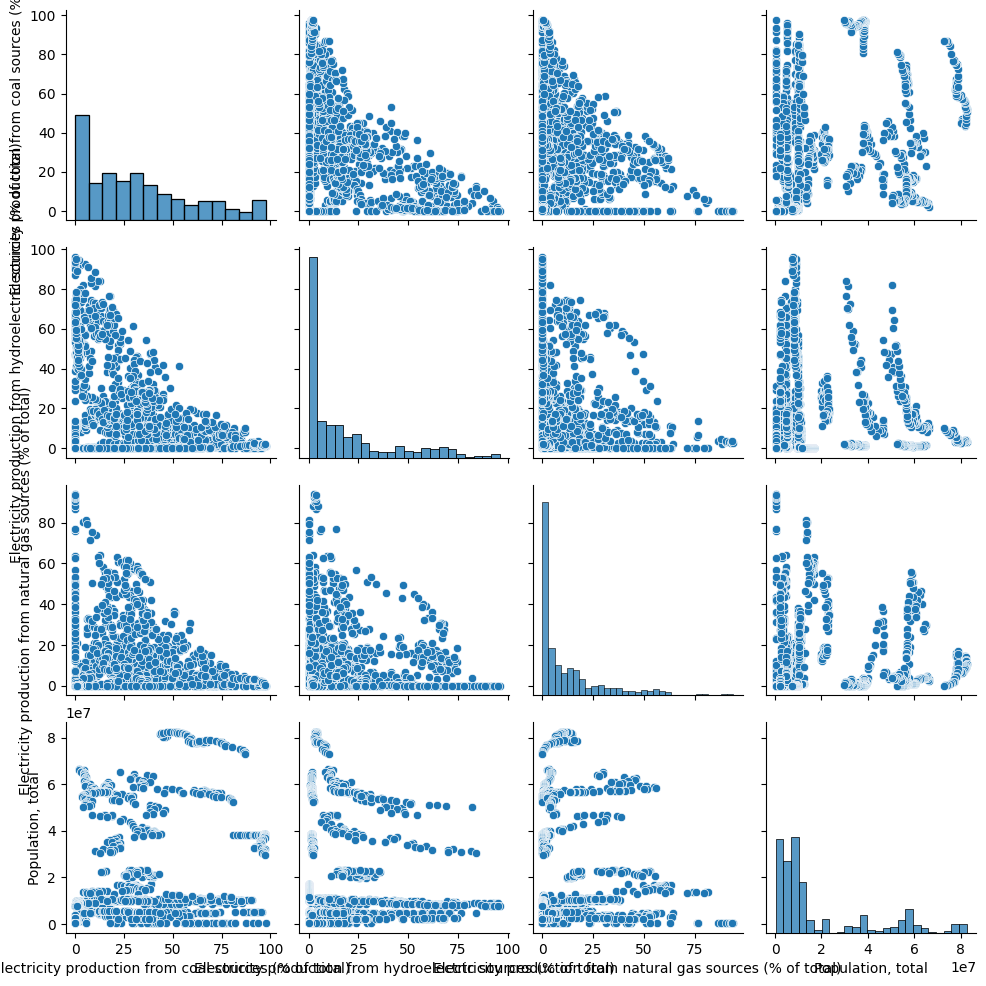

In [28]:
sns.pairplot(df2)

<Axes: xlabel='Electricity production from coal sources (% of total)', ylabel='Population, total'>

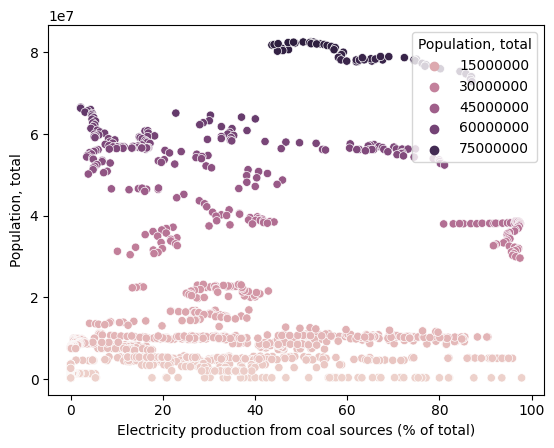

In [ ]:
sns.scatterplot(x='Electricity production from coal sources (% of total)', y='Population, total', data=df2, hue='Population, total')

<Axes: xlabel='Electricity production from hydroelectric sources (% of total)', ylabel='Population, total'>

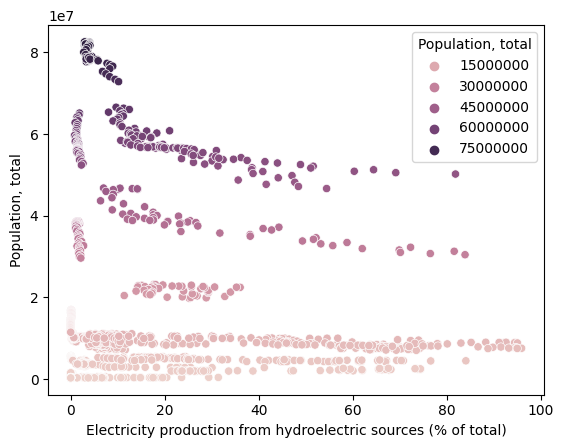

In [ ]:
sns.scatterplot(x='Electricity production from hydroelectric sources (% of total)', y='Population, total', data=df2, hue='Population, total')

<Axes: xlabel='Electricity production from natural gas sources (% of total)', ylabel='Population, total'>

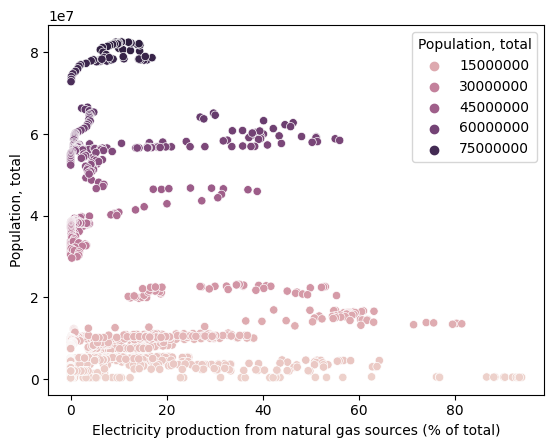

In [ ]:
sns.scatterplot(x='Electricity production from natural gas sources (% of total)', y='Population, total', data=df2, hue='Population, total')

<ipython-input-108-f1c4289474c6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Population, total'], shade=True, color='orangered')


<Axes: xlabel='Population, total', ylabel='Density'>

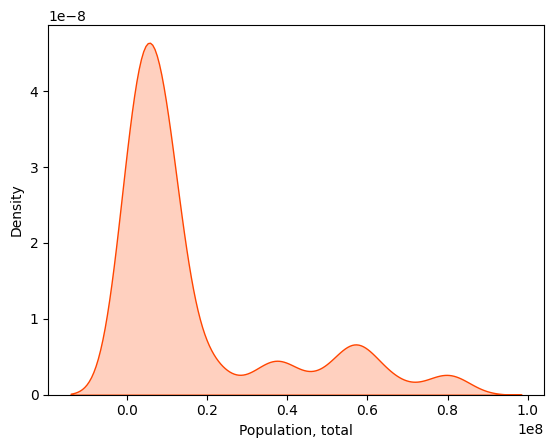

In [ ]:
sns.kdeplot(df2['Population, total'], shade=True, color='orangered')

Electricity production from coal sources (% of total)                Axes(0.125,0.653529;0.227941x0.226471)
Electricity production from hydroelectric sources (% of total)    Axes(0.398529,0.653529;0.227941x0.226471)
Electricity production from natural gas sources (% of total)      Axes(0.672059,0.653529;0.227941x0.226471)
Population, total                                                    Axes(0.125,0.381765;0.227941x0.226471)
dtype: object

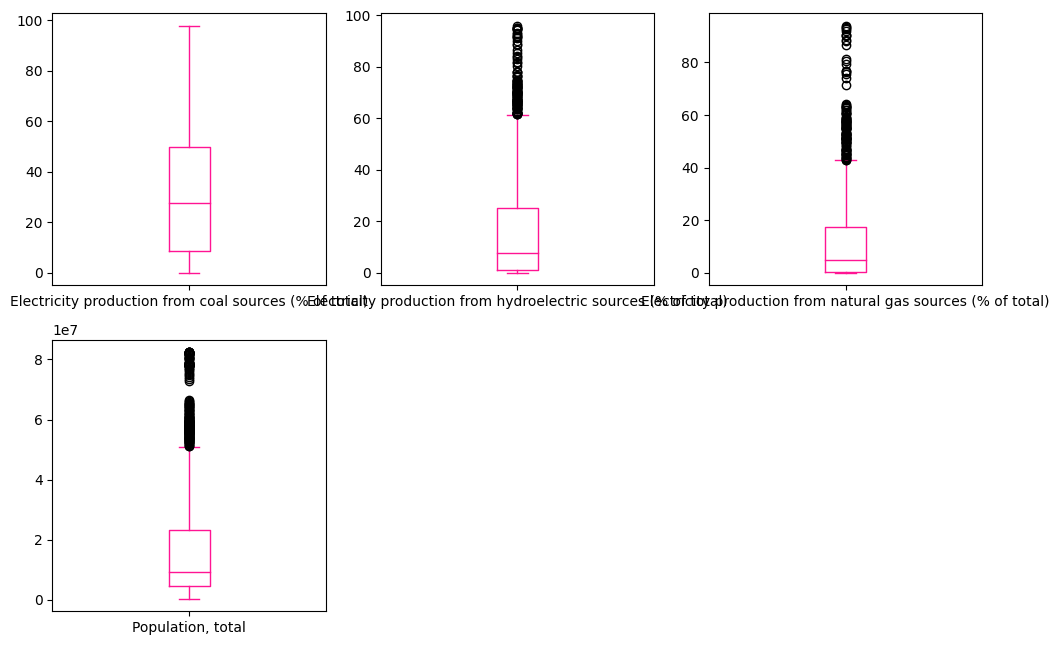

In [29]:
df2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12, 12), color='deeppink')

In [30]:
df2.squeeze()

,Country,Year,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
7,Austria,2015,8.226608,59.997086,12.601396,8642699.0,Austria2015
8,Austria,2014,7.970332,66.557388,8.772072,8546356.0,Austria2014
9,Austria,2013,9.456235,65.132455,10.302091,8479823.0,Austria2013
10,Austria,2012,9.087469,63.753457,14.133314,8429991.0,Austria2012
11,Austria,2011,11.778970,54.989401,19.973664,8391643.0,Austria2011
...,...,...,...,...,...,...,...
1759,Sweden,1964,0.000000,94.942879,0.000000,7661354.0,Sweden1964
1760,Sweden,1963,0.108334,93.236489,0.000000,7604328.0,Sweden1963
1761,Sweden,1962,0.027228,95.975148,0.000000,7561588.0,Sweden1962
1762,Sweden,1961,0.158561,95.048218,0.000000,7519998.0,Sweden1961


from matplotlib import pyplot as plt
df2['Electricity production from coal sources (% of total)'].plot(kind='hist', bins=20, title='Electricity production from coal sources (% of total)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['Electricity production from hydroelectric sources (% of total)'].plot(kind='hist', bins=20, title='Electricity production from hydroelectric sources (% of total)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['Electricity production from natural gas sources (% of total)'].plot(kind='hist', bins=20, title='Electricity production from natural gas sources (% of total)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['Population, total'].plot(kind='hist', bins=20, title='Population, total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Electricity production from coal sources (% of total)', y='Electricity production from hydroelectric sources (% of total)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Electricity production from hydroelectric sources (% of total)', y='Electricity production from natural gas sources (% of total)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Electricity production from natural gas sources (% of total)', y='Population, total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Electricity production from coal sources (% of total)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Electricity production from coal sources (% of total)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Electricity production from hydroelectric sources (% of total)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Electricity production from hydroelectric sources (% of total)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Electricity production from natural gas sources (% of total)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Electricity production from natural gas sources (% of total)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population, total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population, total')

from matplotlib import pyplot as plt
df2['Electricity production from coal sources (% of total)'].plot(kind='line', figsize=(8, 4), title='Electricity production from coal sources (% of total)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['Electricity production from hydroelectric sources (% of total)'].plot(kind='line', figsize=(8, 4), title='Electricity production from hydroelectric sources (% of total)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['Electricity production from natural gas sources (% of total)'].plot(kind='line', figsize=(8, 4), title='Electricity production from natural gas sources (% of total)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['Population, total'].plot(kind='line', figsize=(8, 4), title='Population, total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
series=df2.squeeze()

In [ ]:
ser = df2.iloc[:,0]

In [ ]:
print(type(ser))

<class 'pandas.core.series.Series'>


In [ ]:
df2

,Country,Year,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total"
7,Austria,2015,8.226608,59.997086,12.601396,8642699.0
8,Austria,2014,7.970332,66.557388,8.772072,8546356.0
9,Austria,2013,9.456235,65.132455,10.302091,8479823.0
10,Austria,2012,9.087469,63.753457,14.133314,8429991.0
11,Austria,2011,11.778970,54.989401,19.973664,8391643.0
...,...,...,...,...,...,...
1759,Sweden,1964,0.000000,94.942879,0.000000,7661354.0
1760,Sweden,1963,0.108334,93.236489,0.000000,7604328.0
1761,Sweden,1962,0.027228,95.975148,0.000000,7561588.0
1762,Sweden,1961,0.158561,95.048218,0.000000,7519998.0


KeyError: ignored

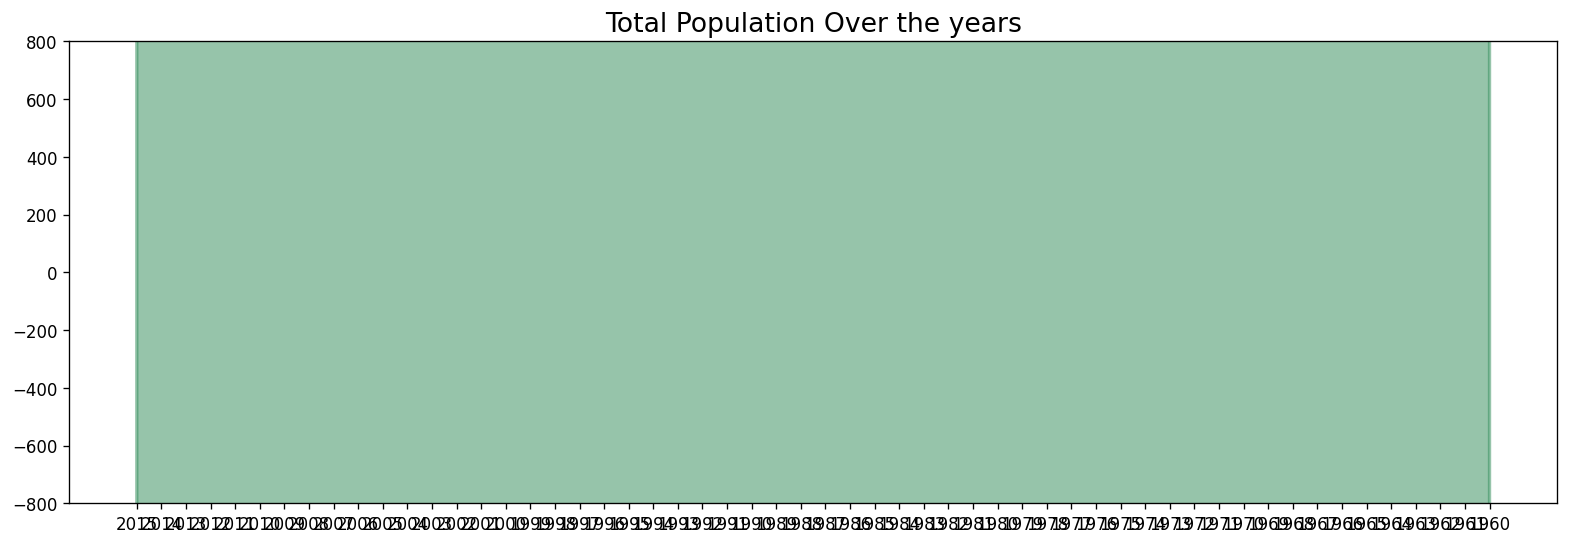

In [ ]:
x = df2['Year'].values
y1 = df2['Population, total'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Total Population Over the years', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Year']), xmax=np.max(df['Year']), linewidth=.2)
plt.show()

In [ ]:
def plot_df(df2, x, y, title="", xlabel='Year', ylabel='Population, total', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df2, x=df2.index, y=df2.value, title='Population  in Australia from 1992 to 2008.')

In [ ]:
print(df2[0:6])

In [ ]:
# refer to the list of countries
list_countries = ['Austria','Belgium','Geremany','Poland']
# intialise two dataframes df_00- year 2000, df_18 - year 2018
df_00 = pd.DataFrame()
df_18 = pd.DataFrame()

# for each dataframe in the list of cleaned dataframes
for i,df in enumerate(df2):
    # pick the value of Total Population for year 2000 and 2018
    df_00[list_countries[i]] = df[df['Year'] == 2000]["Population, total"]
    df_18[list_countries[i]] = df[df['Year'] == 2018]["Population, total"]

# The resulting dataframes have the countries as columns and the two rows each for 2000 and 2018
# To be able to draw a grouped bar plot we need the years as columns, hence we take a transpose
df_00 = df_00.T
df_18 = df_18.T

pd.options.display.float_format = '{:,.1f}'.format  # set other global format

# rename the columns to the year
df_00 = df_00.rename(columns={18 : 2000})
df_18 = df_18.rename(columns={0 : 2018})

# join the dataframes for both the years
df_both_years= df_00.join(df_18)

# the index is the Country name, hence we add it as a column into the data frame.
df_both_years['Countries'] = df_both_years.index

# drop the original index
df_both_years.reset_index(drop=True)

print("Data of Total Population for 2000 and 2018 for all countries: ")
display(df_both_years)

In [ ]:
list_countries

['Austria', 'Belgium', 'Geremany', 'Poland']

In [ ]:
plt.figure(figsize=(7, 5))
# plot the chart using matplotlib.pyplot library
df_both_years.plot(kind='bar',x='Countries',y=[2000, 2018])

In [ ]:
# function to to form a dataframe with Year, GDP and Country
def extract_columns(df_cleaned_us_copy):
    df=pd.DataFrame()
    # pick data for the recent 10 years, note that the data sorted in descending order of year
    df['Year']=df_cleaned.loc[:10, 'Year']
    df['GDP in USD']=df_cleaned.loc[:10, 'GDP in USD']
    df['Country']=df_cleaned.loc[:10, 'Country']
    return df

# function to fetch a single dataframe with 3 features from each country
def form_gdp_df():
    # function call to extract_columns()
    indf=extract_columns(df_cleaned_in)
    usdf=extract_columns(df_cleaned_us)
    cndf=extract_columns(df_cleaned_cn)
    jpdf=extract_columns(df_cleaned_jp)
    cadf=extract_columns(df_cleaned_ca)
    gbdf=extract_columns(df_cleaned_gb)
    zadf=extract_columns(df_cleaned_za)
    # combine the 7 dfs into a single df with 3 columns
    # we ignore the original index
    gdp_df=pd.concat([indf, usdf, cndf, jpdf, cadf, gbdf, zadf], ignore_index=True)
    return gdp_df

# get the combined DF
gdp_df=form_gdp_df()

print("Few records from the Dataframe containing Year, GDP and Country:")
display(gdp_df.head())

# set figure size
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
# plot using seaborn library
ax=sns.lineplot(x='Year', y='GDP in USD', hue='Country', style="Country",palette="Set2", markers=True, dashes=False, data=gdp_df, linewidth=2.5)


In [ ]:
list_df=list(map(change_year_type, df2))

In [ ]:
# create a copy
df_cleaned_us_copy=df_cleaned_us.copy()
# Exclude the categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

NameError: ignored